In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set()

Useful info: <br><br>
https://www.atmoterm.pl/jak-prawidlowo-odczytywac-wyniki-stezen-pylu-pm10-pm25/ 
<br>
http://www.gios.gov.pl/pl/aktualnosci/391-pomiary-pylu-zawieszonego-w-powietrzu



## Load the data

In [2]:
DATA_PATH = 'https://raw.githubusercontent.com/MattBlack85/krakus/synop_data_csv/data/2016_2019_pollution_data.csv'

In [3]:
# read data
df = pd.read_csv(DATA_PATH, sep=',')

# check the df
df.head()

,Unnamed: 0,epoch,pm10_wadow,pm10_piastow,pm10_krasinskiego,pm10_swoszowice,pm10_zloty_rog,pm10_kurdwanow,pm10_dietla,pm25_krasinskiego,pm25_kurdwanow
0,0,1451599200,NaN,NaN,243.643,NaN,213.833,417.618,250.2,200.445,289.665
1,1,1451602800,NaN,NaN,254.931,NaN,237.703,414.837,283.5,211.441,281.380
2,2,1451606400,NaN,NaN,303.558,NaN,342.924,NaN,449.5,248.173,NaN
3,3,1451610000,NaN,NaN,289.828,NaN,329.660,NaN,382.1,240.423,NaN
4,4,1451613600,NaN,NaN,279.998,NaN,322.539,311.513,327.5,230.277,311.200


In [4]:
# conversion of unix EPOCH to datetime object
df['date'] = pd.to_datetime(df['epoch'], unit='s')
# set index to datetime object col
df.set_index(['date'], inplace=True)
# drop unnecessairy column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.shape

(33233, 10)

In [6]:
df.head()

,epoch,pm10_wadow,pm10_piastow,pm10_krasinskiego,pm10_swoszowice,pm10_zloty_rog,pm10_kurdwanow,pm10_dietla,pm25_krasinskiego,pm25_kurdwanow
date,,,,,,,,,,
2015-12-31 22:00:00,1451599200,NaN,NaN,243.643,NaN,213.833,417.618,250.2,200.445,289.665
2015-12-31 23:00:00,1451602800,NaN,NaN,254.931,NaN,237.703,414.837,283.5,211.441,281.380
2016-01-01 00:00:00,1451606400,NaN,NaN,303.558,NaN,342.924,NaN,449.5,248.173,NaN
2016-01-01 01:00:00,1451610000,NaN,NaN,289.828,NaN,329.660,NaN,382.1,240.423,NaN
2016-01-01 02:00:00,1451613600,NaN,NaN,279.998,NaN,322.539,311.513,327.5,230.277,311.200


In [7]:
df.index

DatetimeIndex(['2015-12-31 22:00:00', '2015-12-31 23:00:00',
               '2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               ...
               '2019-10-16 05:00:00', '2019-10-16 06:00:00',
               '2019-10-16 07:00:00', '2019-10-16 08:00:00',
               '2019-10-16 09:00:00', '2019-10-16 10:00:00',
               '2019-10-16 11:00:00', '2019-10-16 12:00:00',
               '2019-10-16 13:00:00', '2019-10-16 14:00:00'],
              dtype='datetime64[ns]', name='date', length=33233, freq=None)

### Check some basic data characteristics

In [8]:
columns_without_epoch = [col for col in df.columns if not 'epoch' in col] 

df[columns_without_epoch].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33233 entries, 2015-12-31 22:00:00 to 2019-10-16 14:00:00
Data columns (total 9 columns):
pm10_wadow           23897 non-null float64
pm10_piastow         32425 non-null float64
pm10_krasinskiego    32967 non-null float64
pm10_swoszowice      6581 non-null float64
pm10_zloty_rog       32304 non-null float64
pm10_kurdwanow       32115 non-null float64
pm10_dietla          32581 non-null float64
pm25_krasinskiego    32964 non-null float64
pm25_kurdwanow       32513 non-null float64
dtypes: float64(9)
memory usage: 2.5 MB


In [9]:
df[columns_without_epoch].describe()

,pm10_wadow,pm10_piastow,pm10_krasinskiego,pm10_swoszowice,pm10_zloty_rog,pm10_kurdwanow,pm10_dietla,pm25_krasinskiego,pm25_kurdwanow
count,23897.000000,32425.000000,32967.000000,6581.000000,32304.000000,32115.000000,32581.000000,32964.000000,32513.000000
mean,33.851908,35.241354,54.090285,29.728595,40.528425,40.409218,45.064285,36.562308,28.177509
std,33.333001,32.832272,42.819777,25.806375,36.503164,39.978210,38.220260,32.940227,32.581679
min,2.997050,3.000000,2.885020,3.000000,3.000000,2.982960,3.000000,3.000000,0.030000
25%,15.522100,16.535100,27.473800,15.103000,18.872375,18.123850,22.491500,16.104625,10.100000
50%,23.922400,25.165100,41.709200,22.329200,29.073500,27.842000,33.717700,26.683600,17.600000
75%,38.648200,41.142500,65.903600,33.878300,47.983275,45.859650,53.978700,44.747575,32.112000
max,404.108000,388.971000,444.367000,316.909000,372.226000,480.523000,453.870000,341.088000,399.271000


### Some questions
To be able to tell that PM10 levels had been reached for particular day, we need to calculate daily mean and compare it against the norms.
* Is it ok to include any available measurements for particular day or maybe we should set some kind of threshold for measurements amount and validate against it?

Let's check daily measurement counts per station:

In [10]:
for col in columns_without_epoch:
    print(f'Measurement frequencies of {col} column:')
    print(df[col].resample('D').count().value_counts())
    print('\n' + '-' * 100 + '\n')


Measurement frequencies of pm10_wadow column:
24    906
0     372
22     39
23     23
21      9
14      6
12      6
20      5
19      4
18      4
17      4
16      3
15      1
13      1
11      1
10      1
8       1
Name: pm10_wadow, dtype: int64

----------------------------------------------------------------------------------------------------

Measurement frequencies of pm10_piastow column:
24    1272
23      31
22      19
12       8
14       7
0        7
18       6
15       5
21       5
13       5
16       4
7        3
1        3
19       2
20       2
8        2
6        2
11       1
9        1
5        1
Name: pm10_piastow, dtype: int64

----------------------------------------------------------------------------------------------------

Measurement frequencies of pm10_krasinskiego column:
24    1344
23       8
21       8
22       6
20       4
0        4
14       3
15       2
13       2
11       2
16       1
9        1
2        1
Name: pm10_krasinskiego, dtype: int64

-----------

In [11]:
pm10_cols = [col for col in columns_without_epoch if 'pm10' in col]
pm25_cols = [col for col in columns_without_epoch if 'pm25' in col]
print(pm10_cols)
print(pm25_cols)

['pm10_wadow', 'pm10_piastow', 'pm10_krasinskiego', 'pm10_swoszowice', 'pm10_zloty_rog', 'pm10_kurdwanow', 'pm10_dietla']
['pm25_krasinskiego', 'pm25_kurdwanow']


In [12]:
plot_params = {
    'figsize': (16, 10),
    'grid': True,
    'alpha': 1.,
    'legend': True,
    'fontsize': 13,
    'kind': 'line',
}

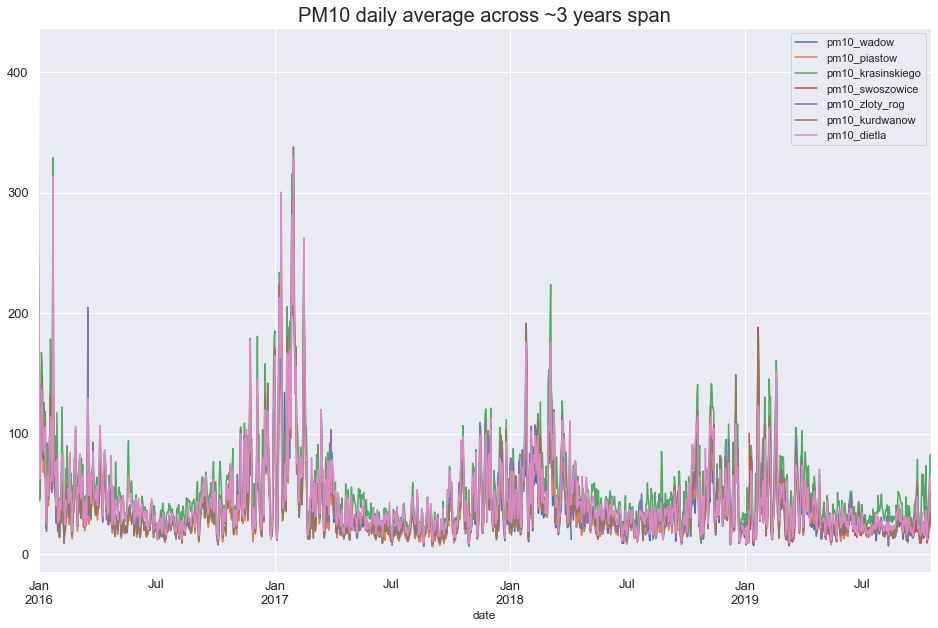

In [13]:

for col in pm10_cols:
    df[col].resample('D').mean().plot(
        **plot_params
    )

plt.title('PM10 daily average across ~3 years span', fontsize=20)
plt.show()

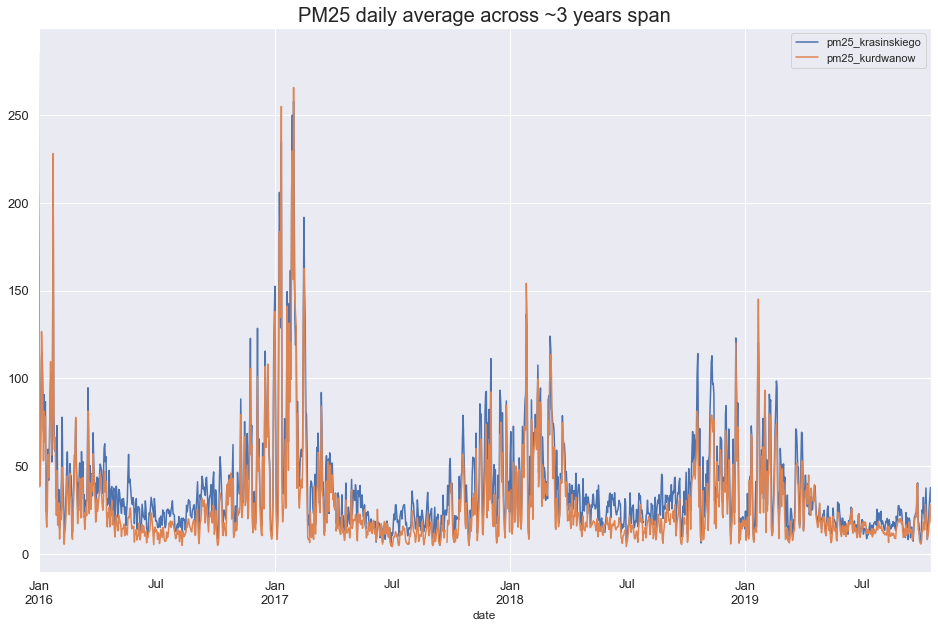

In [14]:
for col in pm25_cols:
    df[col].resample('D').mean().plot(
        **plot_params
    )
    
plt.title('PM25 daily average across ~3 years span', fontsize=20)
plt.show()